# Boston Housing Price 

## 项目说明 

## 环境配置 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import IPython
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

plt.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12, 8

#忽略警号
import warnings
warnings.filterwarnings("ignore")

# 禁用科学计数法 + 保留两位小数
pd.set_option('display.float_format',lambda x : '%.2f' % x)

import random
import time

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import xgboost
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler  # 用于特征归一化
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

## 导入数据 

In [2]:
data_all = pd.read_csv('housing.csv')
# 如果只有一个数据集，在前期可以用这种方法获得两个数据集
# data_raw用来训练并测试模型，data_val用于模拟验证

data_train_x, data_test_x, data_train_y, data_test_y = model_selection.train_test_split(data_all.drop(['Target'], axis=1), data_all['Target'])
data_raw = pd.concat([data_train_x, data_train_y], axis = 1)
data_val = pd.concat([data_test_x, data_test_y], axis = 1)

# 数据预处理（数据清洗+特征工程）都需要对两个数据集同时操作，这样模型才会对验证集有效
data_cleaner = [data_raw, data_val]  


# data_raw, data_val  
# data_raw.info()
data_raw.describe(),data_raw.sample(5)
data_raw

#  1   CRIM     379 non-null    float64 城镇人均犯罪率
#  2   ZN       379 non-null    float64 占地面积超过2.5万平尺房子的住宅用地所占比例
#  3   INDUS    379 non-null    float64 城镇中非零售业务地区的所占比例
#  4   CHAS     379 non-null    float64 查尔斯河边=1 不在河边=0
#  5   NOX      379 non-null    float64 一氧化氮浓度（百万分之xx）
#  6   RM       379 non-null    float64 每个住宅的平均房间数
#  7   AGE      379 non-null    float64 1940年之前建成的自住单位比例
#  8   DIS      379 non-null    float64 与5个波士顿就业中心的加权距离
#  9   RAD      379 non-null    float64 距离高速公路的便利指数
#  10  TAX      379 non-null    float64 每一万美元的不动产税率
#  11  PTRATIO  379 non-null    float64 城镇中教师学生比例 一般来说数值越小越发达（新中国刚成立时是40%，后来逐渐提升到15以内）
#  12  B        379 non-null    float64 计算方法为1000（Bk-0.63）² Bk：城镇中黑人比例
#  13  LSTAT    379 non-null    float64 底层人口比例
#  14  Target   379 non-null    float64 自有住房房价中位数（/1000美元）

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
120,0.07,0.00,25.65,0.00,0.58,5.87,69.70,2.26,2.00,188.00,19.10,389.15,14.37,22.00
449,7.53,0.00,18.10,0.00,0.71,6.42,98.30,2.19,24.00,666.00,20.20,304.21,19.31,13.00
113,0.22,0.00,10.01,0.00,0.55,6.09,95.40,2.55,6.00,432.00,17.80,396.90,17.09,18.70
20,1.25,0.00,8.14,0.00,0.54,5.57,98.10,3.80,4.00,307.00,21.00,376.57,21.02,13.60
79,0.08,0.00,12.83,0.00,0.44,5.87,36.60,4.50,5.00,398.00,18.70,396.06,9.10,20.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.04,80.00,1.52,0.00,0.40,7.29,34.10,7.31,2.00,329.00,12.60,396.90,4.08,33.30
164,2.24,0.00,19.58,0.00,0.60,5.85,91.80,2.42,5.00,403.00,14.70,395.11,11.64,22.70
46,0.19,0.00,6.91,0.00,0.45,5.79,33.30,5.10,3.00,233.00,17.90,396.90,14.15,20.00
357,3.85,0.00,18.10,1.00,0.77,6.39,91.00,2.51,24.00,666.00,20.20,391.34,13.27,21.70


## 数据预处理 

### 矫正与填充 - 异常检查与数据清洗 

In [3]:
print('Train columns with null values:\n', data_raw.isnull().sum())
print("-" * 10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-" * 10)
data_raw.describe(include='all')


# 异常检查
# 'B' 列最小值与最大值偏差较多，将在探索性分析中考察其是否为异常点 


# 数据清洗
# 必须将原始训练集与数据集同时处理，不难理解吧兄弟萌
for data in data_cleaner:
    pass  # 此处本应为缺失值填充给环节，然而数据集很好，无需填充

# data_raw.describe()

Train columns with null values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64
----------
Test/Validation columns with null values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64
----------


### 创建与转换 - 特征工程 

#### 特征分析 - 变量类型判断：数值型/类别型

In [4]:
data_raw.info()  # 全部特征为float型变量，无需处理类别变量 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 120 to 192
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     379 non-null    float64
 1   ZN       379 non-null    float64
 2   INDUS    379 non-null    float64
 3   CHAS     379 non-null    float64
 4   NOX      379 non-null    float64
 5   RM       379 non-null    float64
 6   AGE      379 non-null    float64
 7   DIS      379 non-null    float64
 8   RAD      379 non-null    float64
 9   TAX      379 non-null    float64
 10  PTRATIO  379 non-null    float64
 11  B        379 non-null    float64
 12  LSTAT    379 non-null    float64
 13  Target   379 non-null    float64
dtypes: float64(14)
memory usage: 44.4 KB


#### 特征分析 - 构建特征列表

In [5]:
features = []
data_raw1 = data_raw.copy()
for cols in data_raw1.drop(['Target'], axis=1).columns: 
    features.append(cols)
features 


['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

#### 特征编码与特征缩放 

In [6]:
# 特征编码

# 特征缩放

# scalar = StandardScaler().fit(data_raw)
# data_raw_scaled = scalar.transform(data_raw)
# data_raw1 = pd.DataFrame(data_raw_scaled, columns=features)

## 探索性分析 - 有助于特征选择

### 数值统计

In [1]:
data_raw.describe()
data_raw.describe().to_csv('raw_des.csv', 'w', encoding='utf-8')

NameError: name 'data_raw' is not defined

### sns: pairplot() 变量关系组图

In [7]:
# pairplot() 在数据集中绘制成对关系的图

# sns.pairplot(data_raw) 

# pairplot  # 可以观察 Target列与其他列的分布关系


### sns: distplot() 变量分布直方图

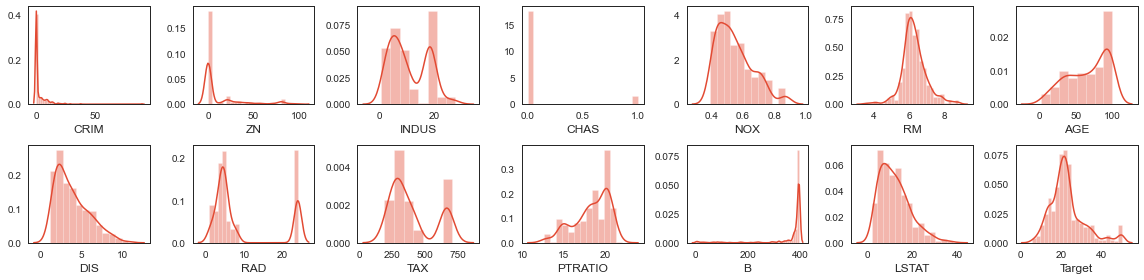

In [8]:
rows = 2 
cols = 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (16, 4))
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data_raw.iloc[:, index], ax=ax[i][j])
        index = index + 1

plt.tight_layout()


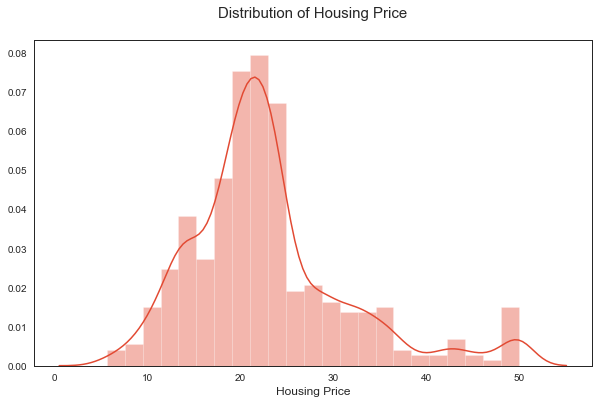

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 6))
data_raw.rename(columns={'Target':'Housing Price'}, inplace=True)
sns.distplot(data_raw.loc[:, 'Housing Price'], ax=axes)

plt.title('Distribution of Housing Price\n', size=15)
plt.show()


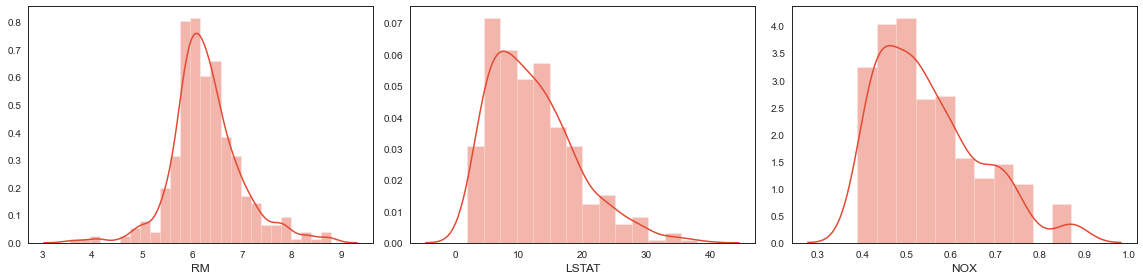

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (16, 4))
sns.distplot(data_raw.loc[:, 'RM'], ax=axes[0])
sns.distplot(data_raw.loc[:, 'LSTAT'], ax=axes[1])
sns.distplot(data_raw.loc[:, 'NOX'], ax=axes[2])
plt.tight_layout()


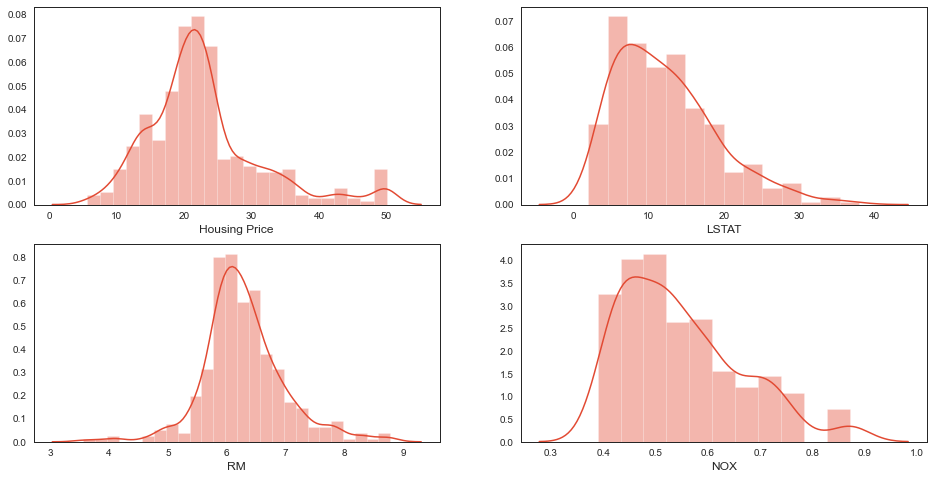

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (16, 8))
sns.distplot(data_raw.loc[:, 'RM'], ax=axes[1,0])
sns.distplot(data_raw.loc[:, 'LSTAT'], ax=axes[0,1])
sns.distplot(data_raw.loc[:, 'NOX'], ax=axes[1,1])
sns.distplot(data_raw.loc[:, 'Housing Price'], ax=axes[0,0])
# plt.suptitle('Scatter graph', fontsize = 20) 
# verticalalignment horizontalalignment


### sns: scatterplot() 散点图

Text(0.5, 1.0, 'NOX - Housing Price')

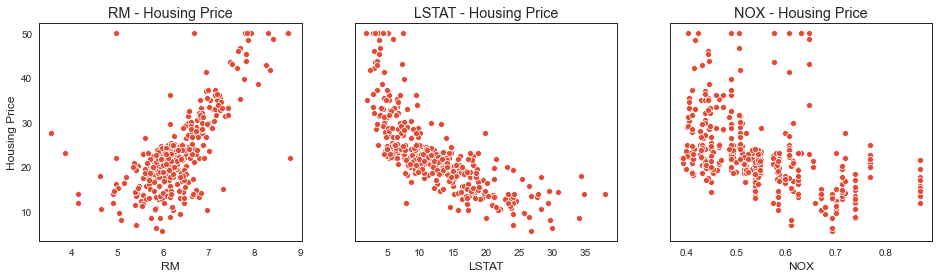

In [12]:
fig, saxis = plt.subplots(1, 3,figsize=(16,4), sharey=True)

sns.scatterplot(x = 'RM', y = 'Housing Price', data=data_raw, ax = saxis[0])
saxis[0].set_title('RM - Housing Price')
sns.scatterplot(x = 'LSTAT', y = 'Housing Price', data=data_raw, ax = saxis[1])
saxis[1].set_title('LSTAT - Housing Price')
sns.scatterplot(x = 'NOX', y = 'Housing Price', data=data_raw, ax = saxis[2])
saxis[2].set_title('NOX - Housing Price')
# plt.suptitle('Scatter graph', fontsize = 20)


### sns: boxplot() 箱图

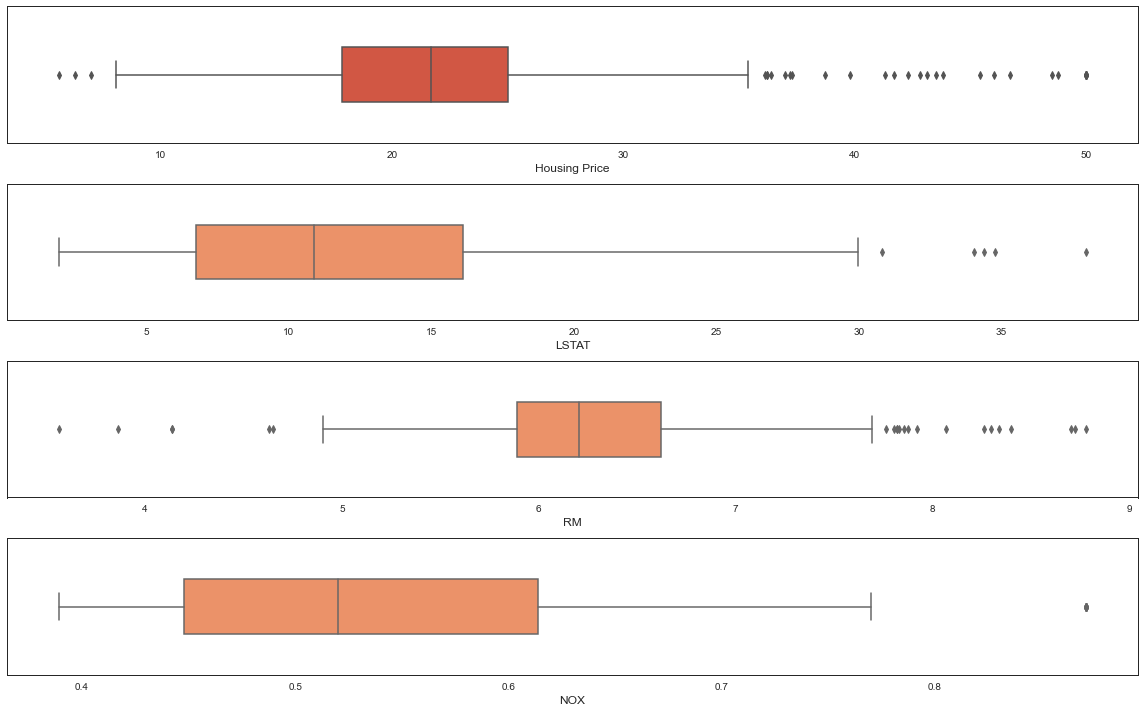

In [18]:
fig, saxis = plt.subplots(4, 1,figsize=(16,10))

sns.boxplot(x = 'Housing Price', data=data_raw, palette='OrRd', saturation=0.8, width=0.4, ax=saxis[0])

sns.boxplot(x = 'LSTAT', data=data_raw,width=0.4,palette='OrRd',saturation=0.8, ax = saxis[1])
sns.boxplot(x = 'NOX', data=data_raw,width=0.4,palette='OrRd',saturation=0.8, ax = saxis[3])
sns.boxplot(x = 'RM', data=data_raw, palette='OrRd', saturation=0.8, width=0.4, ax = saxis[2])

plt.tight_layout()

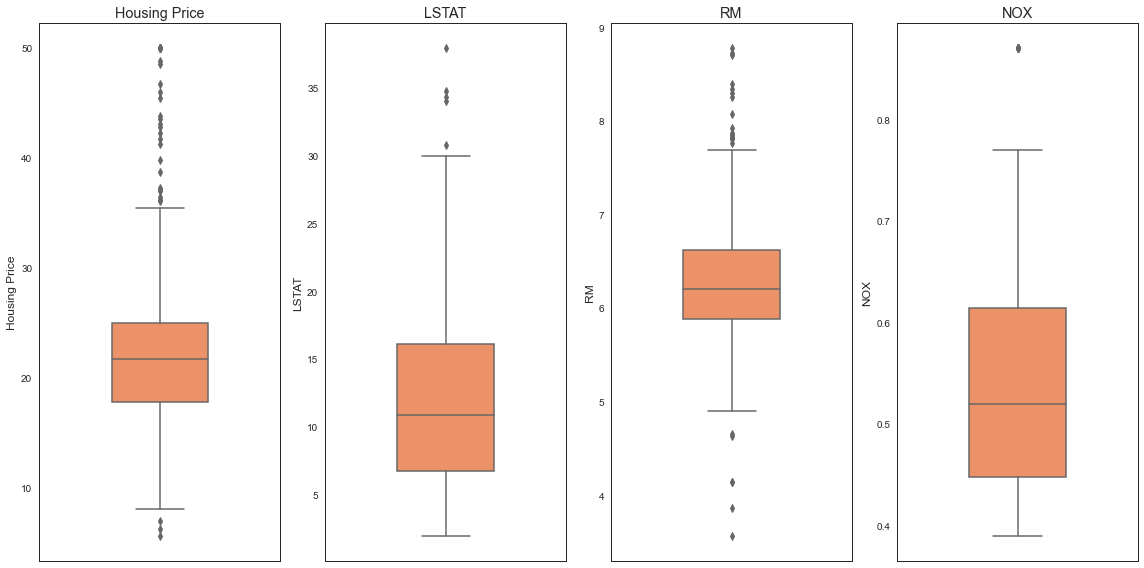

In [14]:
fig, saxis = plt.subplots(1, 4,figsize=(16,8))

sns.boxplot(y = 'Housing Price', data=data_raw, palette='OrRd', saturation=0.8, width=0.4, ax=saxis[0])
saxis[0].set_title('Housing Price')
sns.boxplot(y = 'LSTAT', data=data_raw,width=0.4,palette='OrRd',saturation=0.8, ax = saxis[1])
saxis[1].set_title('LSTAT')
sns.boxplot(y = 'NOX', data=data_raw,width=0.4,palette='OrRd',saturation=0.8, ax = saxis[3])
saxis[3].set_title('NOX')
sns.boxplot(y = 'RM', data=data_raw, palette='OrRd', saturation=0.8, width=0.4, ax = saxis[2])
saxis[2].set_title('RM')
plt.tight_layout()

### sns: violinplot() 小提琴图

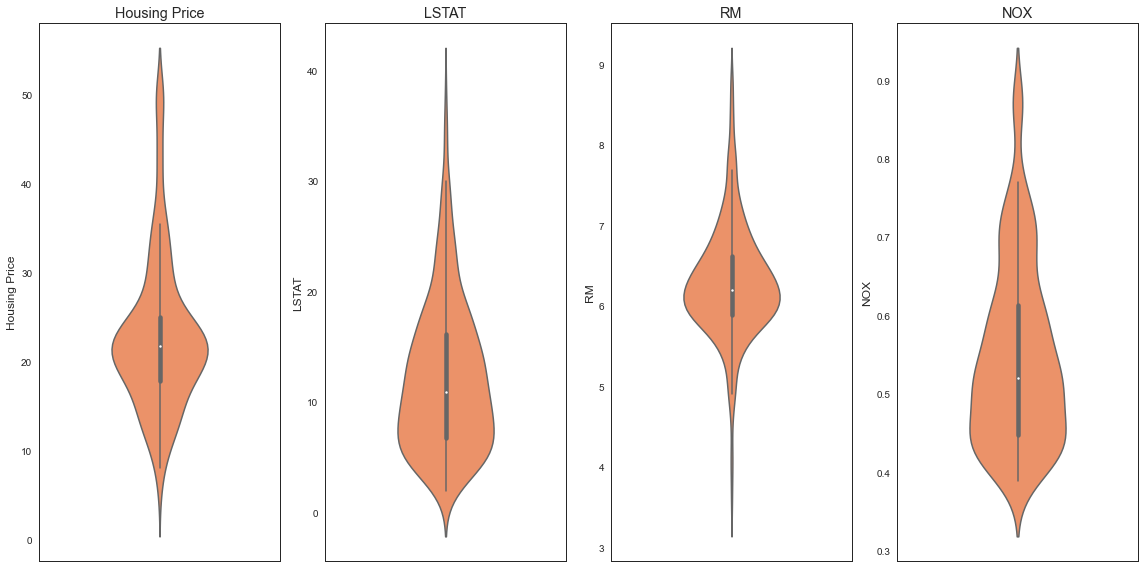

In [22]:
fig, saxis = plt.subplots(1, 4,figsize=(16,8))

sns.violinplot(y = 'Housing Price', data=data_raw, palette='OrRd', saturation=0.8, width=0.4, ax=saxis[0])
saxis[0].set_title('Housing Price')
sns.violinplot(y = 'LSTAT', data=data_raw,width=0.4,palette='OrRd',saturation=0.8, ax = saxis[1])
saxis[1].set_title('LSTAT')
sns.violinplot(y = 'NOX', data=data_raw,width=0.4,palette='OrRd',saturation=0.8, ax = saxis[3])
saxis[3].set_title('NOX')
sns.violinplot(y = 'RM', data=data_raw, palette='OrRd', saturation=0.8, width=0.4, ax = saxis[2])
saxis[2].set_title('RM')
plt.tight_layout()

### sns: regplot() 回归图

Text(0.5, 1.0, 'NOX - Housing Price')

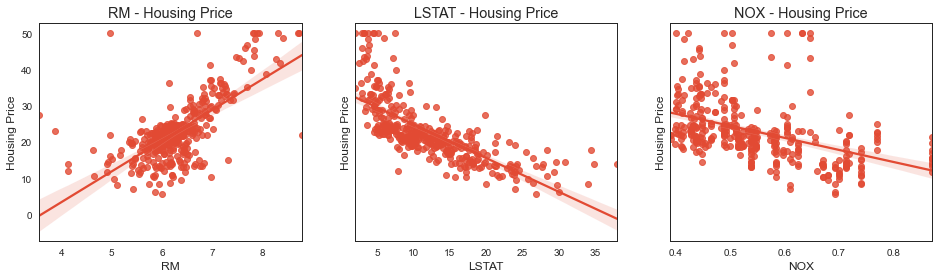

In [20]:
fig, saxis = plt.subplots(1, 3,figsize=(16,4), sharey=True)

sns.regplot(x = 'RM', y = 'Housing Price', data=data_raw, ax = saxis[0])
saxis[0].set_title('RM - Housing Price')
sns.regplot(x = 'LSTAT', y = 'Housing Price', data=data_raw, ax = saxis[1])
saxis[1].set_title('LSTAT - Housing Price')
sns.regplot(x = 'NOX', y = 'Housing Price', data=data_raw, ax = saxis[2])
saxis[2].set_title('NOX - Housing Price')
# plt.suptitle('Scatter graph', fontsize = 20)

### sns: barplot() 柱状图 - 置信区间

In [23]:
data_raw['RM_Bin'] = pd.qcut(data_raw['RM'], 4)
data_raw['LSTAT_Bin'] = pd.qcut(data_raw['LSTAT'], 4)
data_raw['NOX_Bin'] = pd.qcut(data_raw['NOX'], 4)

print(data_raw)

     CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS   RAD    TAX  PTRATIO  \
120  0.07  0.00  25.65  0.00 0.58 5.87 69.70 2.26  2.00 188.00    19.10   
449  7.53  0.00  18.10  0.00 0.71 6.42 98.30 2.19 24.00 666.00    20.20   
113  0.22  0.00  10.01  0.00 0.55 6.09 95.40 2.55  6.00 432.00    17.80   
20   1.25  0.00   8.14  0.00 0.54 5.57 98.10 3.80  4.00 307.00    21.00   
79   0.08  0.00  12.83  0.00 0.44 5.87 36.60 4.50  5.00 398.00    18.70   
..    ...   ...    ...   ...  ...  ...   ...  ...   ...    ...      ...   
196  0.04 80.00   1.52  0.00 0.40 7.29 34.10 7.31  2.00 329.00    12.60   
164  2.24  0.00  19.58  0.00 0.60 5.85 91.80 2.42  5.00 403.00    14.70   
46   0.19  0.00   6.91  0.00 0.45 5.79 33.30 5.10  3.00 233.00    17.90   
357  3.85  0.00  18.10  1.00 0.77 6.39 91.00 2.51 24.00 666.00    20.20   
192  0.09 45.00   3.44  0.00 0.44 7.18 26.30 6.48  5.00 398.00    15.20   

         B  LSTAT  Housing Price          RM_Bin        LSTAT_Bin  \
120 389.15  14.37          22.

Text(0.5, 1.0, 'NOX - Housing Price')

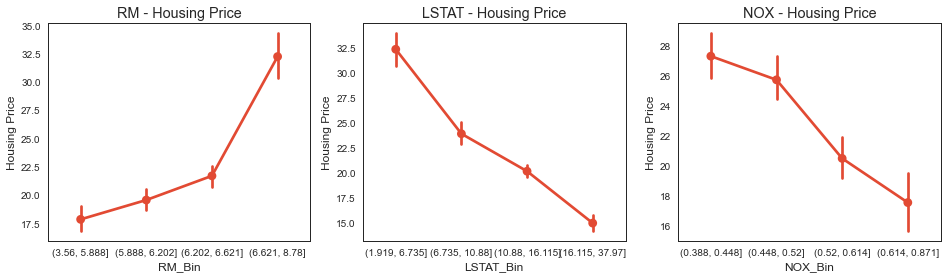

In [58]:
fig, saxis = plt.subplots(1, 3,figsize=(16,4))
sns.pointplot(x="RM_Bin", y="Housing Price",ci=95, data=data_raw, ax=saxis[0])
saxis[0].set_title('RM - Housing Price')
sns.pointplot(x="LSTAT_Bin", y="Housing Price",ci=95, data=data_raw, ax=saxis[1])
saxis[1].set_title('LSTAT - Housing Price')
sns.pointplot(x="NOX_Bin", y="Housing Price",ci=95, data=data_raw, ax=saxis[2])
saxis[2].set_title('NOX - Housing Price')


### sns: heatmap() 相关系数热力图

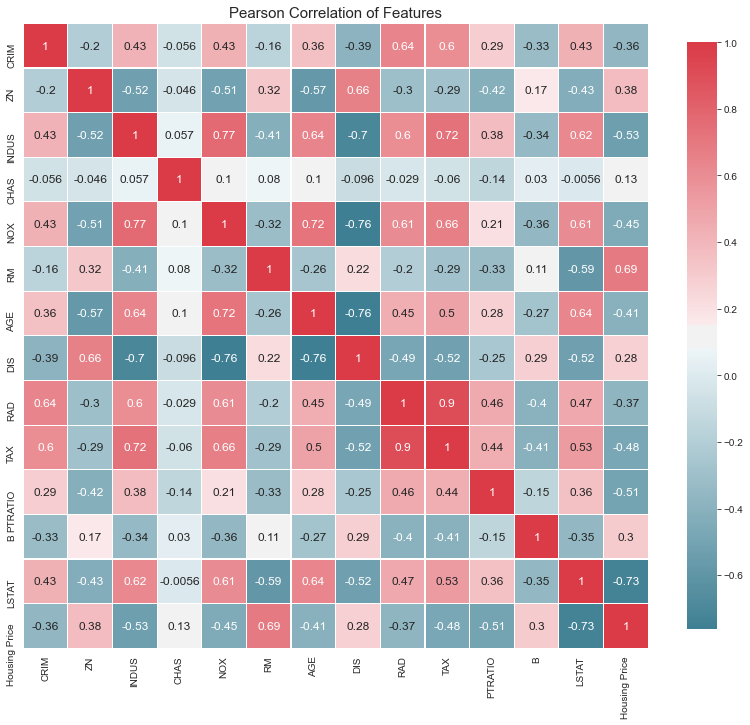

In [16]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
correlation_heatmap(data_raw)

## 建模分析 

### 特征选择 - 简单相关性选择

In [17]:
def feature_select(X, y, n):
    from sklearn.feature_selection import f_regression, SelectKBest
    #  f_regression 计算每个变量与目标变量的相关系数相关系数

    featured_array = SelectKBest(f_regression, k=n).fit_transform(X, y)
    data_featured = pd.DataFrame(featured_array)

    new_feature = []
    for col in X.columns:
        if X.describe()[col].loc['mean'] in data_featured.describe().loc['mean'].to_list():
            new_feature.append(col)
    
    return new_feature

X = data_raw.drop(['Target'], axis=1)
y = data_raw['Target']
n = 5
new_feature = feature_select(X, y, n)  # 简单封装了一下SelectKBest，返回的是选择后的特征数组
new_feature
    # data_featured.describe(), data_raw.describe()

KeyError: "['Target'] not found in axis"

### 模型选择 

In [ ]:
MLA = [
    
    ensemble.AdaBoostRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.RandomForestRegressor(),
#     svm.SVR(),  # R2：0.17 为什么SVR表现这么差呢？
    tree.DecisionTreeRegressor(),
#     gaussian_process.GaussianProcessRegressor(),  # 对特征缩放敏感，必须进行特征标准化
#         linear_model.LogisticRegressionCV(),  # 要求输出离散结果
#     linear_model.ElasticNet(),
#     linear_model.RidgeCV(),
#     svm.SVR(),
    tree.DecisionTreeRegressor(),
    xgboost.XGBRegressor()
]

#### 划分训练集/测试集 - 注意预处理后更改此处

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_raw[features],data_raw['Target'])

### 建模及预测结果 

In [ ]:
    # 为cv做准备，配置好划分参数
    cv_split = model_selection.ShuffleSplit(n_splits=10,test_size=.3,train_size=.6,)
    
    MLA_compare = pd.DataFrame()
    MLA_pred = pd.DataFrame(y_test)
    
    for i, alg in enumerate(MLA):
        
        print(alg.__class__.__name__)  
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[i, 'MLA Name'] = MLA_name
        
        cv_results = model_selection.cross_validate(alg, x_train, y_train, cv=cv_split)
        
        MLA_compare.loc[i, 'cv test_score'] = cv_results['test_score'].mean()
        
        alg.fit(x_train, y_train)
        MLA_pred[MLA_name] = alg.predict(x_test)
        MLA_compare.loc[i, 'R2 Score'] = metrics.r2_score(MLA_pred['Target'], MLA_pred[MLA_name])
        MLA_compare.loc[i, 'RMSE'] = metrics.mean_squared_error(MLA_pred['Target'], MLA_pred[MLA_name])
        MLA_compare.loc[i, 'MAE'] = metrics.mean_absolute_error(MLA_pred['Target'], MLA_pred[MLA_name])
        
    MLA_compare.sort_values(by = ['R2 Score'], ascending = False, inplace = True)
    print(MLA_compare)  
    # 结果比较后，决定采用全特征，并且采用ExtraTrees、GradientBoosting、AdaBoost与XGB模型调参

### 模型对比

In [ ]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='R2 Score', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

### 调参与特征优化

In [ ]:
# 1.gridsearchcv遍历每个模型的主要参数，求出每个模型的最佳参数。

# 2.分别求出feature=3(只考虑'RM', 'PTRATIO', 'LSTAT' 3个features)与feature=13(考虑所有features)时各模型在最佳参数下的r2_Score效果，得出feature=3与13时各自的最佳模型。

# 3.比较feature=3与13时各自最佳模型的r2_Score平均值与方差，得出全局最优模型。
MLA1 = {
     
#     ensemble.AdaBoostRegressor(),  # 调参后得分较低
#     ensemble.GradientBoostingRegressor(), # 高分
#     ensemble.RandomForestRegressor(), # 高分
    ensemble.ExtraTreesRegressor(),  # 调不明白 调完了分还低了
#     ensemble.RandomForestRegressor(),  # 调参后得分较低1
#     xgboost.XGBRegressor()  # 高分
    
}  

param_grid = {  

  
    "GradientBoostingRegressor":{
        'n_estimators':[10,50,100,300], 
        'learning_rate': [0.01,0.05,0.1,0.3,1], 
        'max_depth':[2, 4, 6, 8],
        'min_samples_leaf':[3], },

    "AdaBoostRegressor":{
        'n_estimators': [50, 100], 
        'learning_rate' : [0.01,0.05,0.1,0.3,1],
        'loss' : ['linear', 'square', 'exponential']},

    "ExtraTreesRegressor":{
        'n_estimators':[50,100,300],
        'max_depth':[2, 4, 6, 8]},

    'RandomForestRegressor':{
#         'n_estimators': [10,50,100,300], 
        'n_estimators': [50,300],
#         'max_depth': [2, 4, 6, 8],
        'max_depth': [8],
        'oob_score': [True, False], },
    
    'XGBRegressor':{
            'learning_rate': [0.01,0.05,0.1,0.3,.1], #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': [50, 100], 
             }
    
#     'SVR': {'kernel':('linear', 'rbf'), 
#             'C':[1, 2, 4], 
#             'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]},
    
#     'KNeighborsRegressor': {
#         'weights': ['uniform', 'distance'],
#         'n_neighbors': range(2,100)},
    
#     'DecisionTreeRegressor': {
#         'max_features': ['sqrt', 'log2', None],
#         'max_depth': range(2,1000), },

        
#     "ElasticNet": {
#         "max_iter": [1, 5, 10],
#         "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#          "l1_ratio": np.arange(0.0, 1.0, 0.1)},
    
}  # 这次没用上的 参数列表先存着 下次用吧

# new_feature 不完全特征模型
# feature_x 完全特征

for alg in MLA1:
    base_results = model_selection.cross_validate(alg, x_train, y_train, cv  = cv_split)
    alg.fit(data_raw[features], data_raw['Target'])
    
    alg_name = alg.__class__.__name__
    # cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 
    print('Algorthm is: ', alg_name)
    print('BEFORE Parameters: ', alg.get_params())
    print("BEFORE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
    print("BEFORE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
    #print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
    print('-'*10)

    # 网格调优
    tune_model = model_selection.GridSearchCV(alg, param_grid=param_grid[alg_name], scoring = 'r2', cv = cv_split)  # 注意这里使用r2
    tune_model.fit(x_train, y_train)

    print(tune_model.cv_results_.keys())
    #print(tune_model.cv_results_['params'])
    print('AFTER Parameters: ', tune_model.best_params_)
    #print(tune_model.cv_results_['mean_test_score'])
    print("AFTER Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
    print("AFTER Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
    print('-'*10)
    


In [ ]:
# Algorthm is:  XGBRegressor
# BEFORE Parameters:  {'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
# BEFORE Test w/bin score mean: 82.42
# BEFORE Test w/bin score 3*std: +/- 14.95
# ----------
# dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
# AFTER Parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
# AFTER Test w/bin score mean: 86.40
# AFTER Test w/bin score 3*std: +/- 10.06
# ----------
# Algorthm is:  GradientBoostingRegressor
# BEFORE Parameters:  {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
# BEFORE Test w/bin score mean: 85.30
# BEFORE Test w/bin score 3*std: +/- 20.92
# ----------
# dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_min_samples_leaf', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
# AFTER Parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 300}
# AFTER Test w/bin score mean: 86.86
# AFTER Test w/bin score 3*std: +/- 11.75
# ----------
# Algorthm is:  RandomForestRegressor
# BEFORE Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
# BEFORE Test w/bin score mean: 85.06
# BEFORE Test w/bin score 3*std: +/- 8.44
# ----------
# dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'param_oob_score', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
# AFTER Parameters:  {'max_depth': 8, 'n_estimators': 300, 'oob_score': True}
# AFTER Test w/bin score mean: 86.43
# AFTER Test w/bin score 3*std: +/- 6.54
# ----------

### 模型验证 

In [ ]:
xy_test = x_test.copy()
xy_test['Target'] = y_test

# RandomForestRegressor
test_model = ensemble.RandomForestRegressor(n_estimators=300, max_depth=8,oob_score=True)
test_model.fit(x_train, y_train)
xy_test['p_RandomForest'] = test_model.predict(x_test[features])

# GradientBoostingRegressor
test_model = ensemble.GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=2,min_samples_leaf=3)
test_model.fit(x_train, y_train)
xy_test['p_GradientBoosting'] = test_model.predict(x_test[features])

# XGBRegressor
test_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)
test_model.fit(x_train, y_train)
xy_test['p_XGB'] = test_model.predict(x_test[features])

# 简单融合？
xy_test.eval('p_mean = (p_XGB+p_GradientBoosting+p_RandomForest)/3', inplace=True)

# xy_test.info()
# xy_test.describe()
# xy_test.sample(10)
print('The R2 of mean: ', metrics.r2_score(xy_test['Target'], xy_test['p_mean']))
print('The R2 of RandomForest: ',metrics.r2_score(xy_test['Target'], xy_test['p_RandomForest']))
print('The R2 of GradientBoostig: ',metrics.r2_score(xy_test['Target'], xy_test['p_GradientBoosting']))
print('The R2 of XGB: ',metrics.r2_score(xy_test['Target'], xy_test['p_XGB']))

# 看来还是XGB狠啊


### 预测结果可视化

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(12, 8))

plt.title('XGB vs Target')

sns.lineplot(x=xy_test.index, y='Target', data=xy_test, ax=axes[0])
sns.lineplot(x=xy_test.index, y='p_XGB', data=xy_test, ax=axes[0])


sns.pointplot(x=xy_test.index, y='Target', data=xy_test, color='g', ax=axes[1])
sns.pointplot(x=xy_test.index, y='p_XGB', data=xy_test, color='r', ax=axes[1])
